In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt 


In [2]:
#step 1:create a sample dataset
## create a simple dataset 
data = {
    'study_hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'previous_score': [45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85],
    'passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]}

df = pd.DataFrame(data)
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   study_hours  previous_score  passed
0            1              45       0
1            2              50       0
2            3              55       0
3            4              60       0
4            5              65       1


In [3]:
df.isnull().sum()  # Check for missing values

study_hours       0
previous_score    0
passed            0
dtype: int64

In [4]:
#step2: prepare the data 
#feature (X) and target variable y
X= df[['study_hours',"previous_score"]]
y= df['passed']# Dependent variable (what we want to predict)


In [5]:
#step3: split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set: {len(X_train)} samples ")
print(f"Testing set:{len(X_test)} samples")

Training set: 16 samples 
Testing set:4 samples


In [6]:
#step4 : cretae and train the logistic regression model
model  = LogisticRegression()
model.fit(X_train,y_train)
print("\nModel trained successfully.")


Model trained successfully.


In [7]:
#step5 : make predictions
y_pred = model.predict(X_test)
#predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

print("\nPredictions:")
print(y_pred)


Predictions:
[0 1 1 0]


In [8]:
#making Binary predictions 
y_pred = model.predict(X_test)


print("\nPredictions vs Actual:")
for i in range(len(X_test)):
    print(f"Student {i+1}: Probability={y_prob[i]:.3f}, Predicted={y_pred[i]}, Actual={y_test.iloc[i]}")


Predictions vs Actual:
Student 1: Probability=0.002, Predicted=0, Actual=0
Student 2: Probability=1.000, Predicted=1, Actual=1
Student 3: Probability=0.984, Predicted=1, Actual=1
Student 4: Probability=0.016, Predicted=0, Actual=0



Model Accuracy: 1.00

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


confusion_matrix
[[2 0]
 [0 2]]


Text(0.5, 1.0, 'Confusion Matrix')

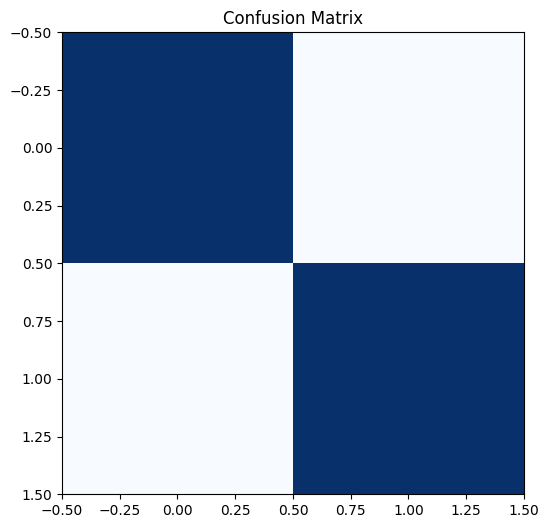

In [9]:
#step 6 : evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
# Detailed classification report
print(f"\nClassification Report")
print(classification_report(y_test,y_pred))
# Confusion matrix
print(f"\nconfusion_matrix")
print(confusion_matrix(y_test,y_pred))
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

In [10]:
# Step 7: Interpret the model coefficients
print(f"\nModel Coefficients (Weights):")
print(f"Intercept (β₀): {model.intercept_[0]:.3f}")
print(f"Study Hours coefficient (β₁): {model.coef_[0][0]:.3f}")
print(f"Previous Score coefficient (β₂): {model.coef_[0][1]:.3f}")


Model Coefficients (Weights):
Intercept (β₀): -16.626
Study Hours coefficient (β₁): 1.020
Previous Score coefficient (β₂): 0.209


In [11]:
# What this means:
print(f"\nInterpretation:")
print(f"- Each additional study hour increases odds of passing by factor of {np.exp(model.coef_[0][0]):.3f}")
print(f"- Each additional point in previous score increases odds by factor of {np.exp(model.coef_[0][1]):.3f}")



Interpretation:
- Each additional study hour increases odds of passing by factor of 2.774
- Each additional point in previous score increases odds by factor of 1.233


In [14]:
# Step 8: Make predictions for new students
new_students = np.array([[5, 70], [8, 85], [3, 45]])
new_probabilities = model.predict_proba(new_students)[:, 1]
new_predictions = model.predict(new_students)

print(f"\nPredictions for new students:")
for i, (hours, score) in enumerate(new_students):
    print(f"Student with {hours} study hours and {score} previous score:")
    print(f"  Probability of passing: {new_probabilities[i]:.3f}")
    print(f"  Prediction: {'Pass' if new_predictions[i] == 1 else 'Fail'}")


Predictions for new students:
Student with 5 study hours and 70 previous score:
  Probability of passing: 0.958
  Prediction: Pass
Student with 8 study hours and 85 previous score:
  Probability of passing: 1.000
  Prediction: Pass
Student with 3 study hours and 45 previous score:
  Probability of passing: 0.016
  Prediction: Fail


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
